In [3]:
# Se importan las librerias que necesitamos
from pycoingecko import CoinGeckoAPI
import pandas as pd
import plotly.express as px
import requests
import datetime
import matplotlib.pyplot as plt


In [4]:
# Inicializa la API de CoinGecko
cg = CoinGeckoAPI()

# Obtiene los datos de todas las criptomonedas

coins=cg.get_coins_list()


In [5]:
df_coins=pd.DataFrame(coins)

In [6]:
df_coins.head

<bound method NDFrame.head of                              id symbol                       name
0                        01coin    zoc                     01coin
1                        0chain    zcn                        Zus
2                 0vix-protocol    vix              0VIX Protocol
3                            0x    zrx                0x Protocol
4      0x0-ai-ai-smart-contract    0x0  0x0.ai: AI Smart Contract
...                         ...    ...                        ...
10102                  zynecoin    zyn                   Zynecoin
10103                   zynergy    zyn                    Zynergy
10104                     zyrri    zyr                      Zyrri
10105                       zyx    zyx                        ZYX
10106                       zzz    zzz                GoSleep ZZZ

[10107 rows x 3 columns]>

In [7]:
df_coins.columns

Index(['id', 'symbol', 'name'], dtype='object')

In [8]:
df_coins=cg.get_coins_list()
coinDataframe=pd.DataFrame.from_dict(df_coins).sort_values('id').reset_index(drop=True)

Las 10 monedas cripto que se tendrán en cuenta para el análisis serán las siguientes:

Bitcoin (BTC): Como la primera criptomoneda y la de mayor capitalización de mercado, es esencial para comprender el mercado en general y su impacto en otras criptomonedas.

Ethereum (ETH): Es conocida por su plataforma de contratos inteligentes y DApps, lo que la convierte en una criptomoneda influyente para el análisis de la tecnología blockchain.

Binance Coin (BNB): Utilizada en el ecosistema de Binance y para reducir tarifas de transacción, BNB podría ofrecer información sobre el funcionamiento interno de un exchange.

Cardano (ADA): Una criptomoneda que se centra en la escalabilidad y la sostenibilidad, y que puede proporcionar ideas sobre enfoques de blockchain más avanzados.

Solana (SOL): Una blockchain de alto rendimiento con aplicaciones en DeFi y NFTs, lo que la hace relevante para entender nuevas tendencias en criptomonedas.

Polkadot (DOT): Una plataforma que busca conectar múltiples blockchains, lo que podría arrojar luz sobre la interoperabilidad entre diferentes criptomonedas.

Ripple (XRP): Con un enfoque en las transacciones internacionales y la colaboración con instituciones financieras, XRP puede proporcionar información sobre casos de uso en el sector financiero.

Dogecoin (DOGE): Conocida por su naturaleza meme, DOGE puede ser interesante para analizar el efecto de las redes sociales en el precio y la adopción de criptomonedas.

USD Coin (USDC): Una stablecoin respaldada por dólares estadounidenses, que puede ofrecer información sobre la relación entre las criptomonedas y las monedas tradicionales.

Aave (AAVE): Un protocolo DeFi popular para préstamos y préstamos, que podría ser relevante para analizar la adopción de finanzas descentralizadas.



#### Consulta de las id de cada una de las monedas escogidas para el análisis

In [9]:
#coinDataframe[coinDataframe['id']=='bitcoin']
#coinDataframe[coinDataframe['id']=='ethereum']
#coinDataframe[coinDataframe['id']=='cardano']
#coinDataframe[coinDataframe['id']=='solana']
#coinDataframe[coinDataframe['id']=='polkadot']
#coinDataframe[coinDataframe['id']=='ripple']
#coinDataframe[coinDataframe['id']=='dogecoin']
coinDataframe[coinDataframe['id']=='aave']
#coinDataframe[coinDataframe['name']=='USD Coin']
#coinDataframe[coinDataframe['id']=='binancecoin']
#coinDataframe[coinDataframe['id']=='solana']

,id,symbol,name
66,aave,aave,Aave


In [112]:
#cración de una lista de mondesas con cada una de las 'id'
coins_analysis=['bitcoin', 'ethereum', 'cardano','polkadot', 'ripple', 'dogecoin','usd-coin', 'binancecoin','solana']

In [113]:
#Lista de las monedas (Currencies) con las cuales se comparan las cripto
vsCurrencies=['usd','eur']

In [12]:
#simplePriceRequest= cg.get_price(ids=coins_analysis, vs_currencies='usd')
#print (simplePriceRequest)

In [13]:
#all_coins = cg.get_coins_markets(vs_currency=('usd'), category= 'stablecoins', order= 'volume_desc')

In [114]:
#Aplicación del Endpoint get_coins_markets de la api coingecko
coinsMktDataByIds=cg.get_coins_markets(vs_currency='usd',ids= coins_analysis)
#print(coinsMktDataByIds)

#Creación del DataFrame a partir de los datos resultantes de la aplicación del EndPoint get_coins_markets de la api coingecko
CoinsMktAnalysis= pd.DataFrame(coinsMktDataByIds)

### Análisis de la información del Dataframe

In [115]:
CoinsMktAnalysis.head

<bound method NDFrame.head of             id symbol      name  \
0      bitcoin    btc   Bitcoin   
1     ethereum    eth  Ethereum   
2  binancecoin    bnb       BNB   
3       ripple    xrp       XRP   
4     usd-coin   usdc  USD Coin   
5      cardano    ada   Cardano   
6     dogecoin   doge  Dogecoin   
7       solana    sol    Solana   
8     polkadot    dot  Polkadot   

                                               image  current_price  \
0  https://assets.coingecko.com/coins/images/1/la...   25932.000000   
1  https://assets.coingecko.com/coins/images/279/...    1661.790000   
2  https://assets.coingecko.com/coins/images/825/...     215.540000   
3  https://assets.coingecko.com/coins/images/44/l...       0.504109   
4  https://assets.coingecko.com/coins/images/6319...       1.001000   
5  https://assets.coingecko.com/coins/images/975/...       0.263672   
6  https://assets.coingecko.com/coins/images/5/la...       0.063409   
7  https://assets.coingecko.com/coins/images/4128..

In [116]:
CoinsMktAnalysis.describe()

,current_price,market_cap,market_cap_rank,fully_diluted_valuation,total_volume,high_24h,low_24h,price_change_24h,price_change_percentage_24h,market_cap_change_24h,market_cap_change_percentage_24h,circulating_supply,total_supply,max_supply,ath,ath_change_percentage,atl,atl_change_percentage
count,9.000000,9.000000e+00,9.000000,9.000000e+00,9.000000e+00,9.000000,9.000000,9.000000,9.000000,9.000000e+00,9.000000,9.000000e+00,9.000000e+00,4.000000e+00,9.000000,9.000000,9.000000,9.000000
mean,3093.034688,9.134588e+10,6.333333,1.002029e+11,4.089792e+09,3158.497010,3062.531112,-65.386491,-0.976781,-1.550958e+09,-0.935556,2.849924e+10,3.486948e+10,3.630525e+10,8325.877953,-73.666292,8.042586,117909.762348
std,8581.778268,1.664629e+11,3.708099,1.770912e+11,6.270131e+09,8767.013233,8497.398255,185.056939,0.912070,3.338446e+09,0.801166,4.632883e+10,5.188991e+10,4.744385e+10,22824.517790,25.263155,22.429188,200968.335853
min,0.063409,5.674391e+09,1.000000,6.037244e+09,1.050192e+08,0.063920,0.062225,-558.368216,-2.107800,-1.015372e+10,-1.974180,1.946176e+07,2.100000e+07,2.100000e+07,0.731578,-91.828840,0.000087,14.003680
25%,0.504109,8.908494e+09,4.000000,1.185579e+10,3.564690e+08,0.509487,0.494612,-4.138638,-1.604300,-5.362054e+08,-1.554160,1.538562e+08,1.538562e+08,1.552500e+08,3.090000,-91.447230,0.019253,1271.318880
50%,4.490000,2.599913e+10,6.000000,2.599913e+10,4.300102e+08,4.550000,4.460000,-0.023121,-0.979090,-1.833298e+08,-0.871190,1.265903e+09,1.346853e+09,2.260000e+10,54.980000,-85.155260,0.432979,18680.792600
75%,215.540000,3.313777e+10,9.000000,5.034116e+10,6.264892e+09,219.680000,214.160000,-0.002607,-0.512790,-8.114433e+07,-0.700200,3.504502e+10,4.500000e+10,5.875000e+10,686.310000,-65.917600,0.877647,72919.260450
max,25932.000000,5.041732e+11,12.000000,5.440226e+11,1.813297e+10,26491.000000,25677.000000,0.000413,0.656310,6.004957e+07,0.678650,1.406528e+11,1.406530e+11,1.000000e+11,69045.000000,-14.680300,67.810000,541951.430110


In [117]:
CoinsMktAnalysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 26 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                9 non-null      object 
 1   symbol                            9 non-null      object 
 2   name                              9 non-null      object 
 3   image                             9 non-null      object 
 4   current_price                     9 non-null      float64
 5   market_cap                        9 non-null      int64  
 6   market_cap_rank                   9 non-null      int64  
 7   fully_diluted_valuation           9 non-null      int64  
 8   total_volume                      9 non-null      int64  
 9   high_24h                          9 non-null      float64
 10  low_24h                           9 non-null      float64
 11  price_change_24h                  9 non-null      float64
 12  price_change

In [110]:
CoinsMktAnalysis.columns

Index(['id', 'symbol', 'name', 'image', 'current_price', 'market_cap',
       'market_cap_rank', 'fully_diluted_valuation', 'total_volume',
       'high_24h', 'low_24h', 'price_change_24h',
       'price_change_percentage_24h', 'market_cap_change_24h',
       'market_cap_change_percentage_24h', 'circulating_supply',
       'total_supply', 'max_supply', 'ath', 'ath_change_percentage',
       'ath_date', 'atl', 'atl_change_percentage', 'atl_date', 'roi',
       'last_updated'],
      dtype='object')

In [118]:
#Visualización de los datos del dataframe en donde se identifica la correlación de los datos de las columnas Ranking y Capitalización de Mercado

fig = px.bar(CoinsMktAnalysis, x="market_cap_rank", y="market_cap", hover_name="name", log_y=True)
fig.update_layout(title="Ranking vs. Capitalización de Mercado de Criptomonedas")
fig.show()

In [28]:
# Grafiación de la correlación de los datos de las columnas 'market_cap' y 'total_volume'

fig = px.scatter(coinsMktDataByIds, x="market_cap", y="total_volume", hover_name="name",
                 title="Capitalización de Mercado vs. Volumen de Negociación",
                 labels={"market_cap": "Capitalización de Mercado (USD)",
                         "total_volume": "Volumen de Negociación"})

fig.update_layout(xaxis_type="log", yaxis_type="log")
fig.show()


In [ ]:
# Graficación de la correlación entre la capitalización de Mercado y el Precio Actual del conjunto de monedas de análisis

fig = px.scatter(CoinsMktAnalysis, x="current_price", y="market_cap", hover_name="name",
                 title="Relación entre Capitalización de Mercado y Precio Actual",
                 labels={"current_price": "Precio Actual (USD)",
                         "market_cap": "Capitalización de Mercado (USD)"})
fig.update_layout(xaxis_title="Precio Actual (USD)", yaxis_title="Capitalización de Mercado (USD)")
fig.update_traces(marker=dict(size=10))
fig.show()


In [ ]:

cadena = ', '.join(coins_analysis)
print(cadena)


bitcoin, ethereum, cardano, polkadot, ripple, dogecoin, usd-coin, binancecoin, solana


### Ánalisis de comportamiento del precio del conjunto de monedas desde el 2020-01-01 hasta el 2023-01-01

In [23]:
import requests
import datetime

def get_price_history(coins_analysis):
    url = "https://api.coingecko.com/api/v3/coins/markets"

    # Fecha actual
    end_date = datetime.datetime.now()

    # Fecha hace tres años
    start_date = end_date - datetime.timedelta(days=3 * 365)

    # Parámetros de la API
    params = {
        "vs_currency": "usd",
        "ids": ','.join(coins_analysis),
        "from": int(start_date.timestamp()),
        "to": int(end_date.timestamp())
    }

    response = requests.get(url, params=params)
    data = response.json()
    return data


In [25]:
price_history= get_price_history( ['bitcoin', 'ethereum', 'cardano','polkadot', 'ripple', 'dogecoin','usd-coin', 'binancecoin','solana'])

In [26]:
price_history

[{'id': 'bitcoin',
  'symbol': 'btc',
  'name': 'Bitcoin',
  'image': 'https://assets.coingecko.com/coins/images/1/large/bitcoin.png?1547033579',
  'current_price': 26173,
  'market_cap': 509757376193,
  'market_cap_rank': 1,
  'fully_diluted_valuation': 550062752931,
  'total_volume': 26001891348,
  'high_24h': 27714,
  'low_24h': 25649,
  'price_change_24h': -1540.6938305828226,
  'price_change_percentage_24h': -5.55928,
  'market_cap_change_24h': -30553421309.111084,
  'market_cap_change_percentage_24h': -5.65479,
  'circulating_supply': 19461243.0,
  'total_supply': 21000000.0,
  'max_supply': 21000000.0,
  'ath': 69045,
  'ath_change_percentage': -62.06394,
  'ath_date': '2021-11-10T14:24:11.849Z',
  'atl': 67.81,
  'atl_change_percentage': 38527.41242,
  'atl_date': '2013-07-06T00:00:00.000Z',
  'roi': None,
  'last_updated': '2023-08-18T20:44:25.907Z'},
 {'id': 'ethereum',
  'symbol': 'eth',
  'name': 'Ethereum',
  'image': 'https://assets.coingecko.com/coins/images/279/large/et

In [47]:
import requests
import datetime

def get_price_history(coins_analysis):
    url = "https://api.coingecko.com/api/v3/coins/markets"

    # Fecha actual
    end_date = datetime.datetime.now()

    # Fecha de inicio (1 de enero de 2020)
    start_date = datetime.datetime(2020, 1, 1)

    # Parámetros de la API
    params = {
        "vs_currency": "usd",
        "ids": ','.join(coins_analysis),
        "from": int(start_date.timestamp()),
        "to": int(end_date.timestamp())
    }

    response = requests.get(url, params=params)
    data = response.json()
    return data

def get_historical_price(coin_id, start_date, end_date):
    url = f"https://api.coingecko.com/api/v3/coins/{coin_id}/market_chart/range"
    params = {
        "vs_currency": "usd",
        "from": start_date.timestamp(),
        "to": end_date.timestamp()
    }

    response = requests.get(url, params=params)
    data = response.json()
    return data

# Lista de criptomonedas
crypto_list = ['bitcoin', 'ethereum', 'cardano', 'polkadot', 'ripple']

# Obtener el historial de precios
price_history = get_price_history(crypto_list)

# Recorrer la lista de resultados e imprimir los datos
for coin_data in price_history:
    print(f"Nombre: {coin_data['name']}")
    print(f"Precio Actual: {coin_data['current_price']} USD")
    print(f"Capitalización de Mercado: {coin_data['market_cap']} USD")
    print(f"Volumen Total: {coin_data['total_volume']} USD")
    print(f"Cambio de Precio en 24 horas: {coin_data['price_change_24h']} USD")
    print(f"% Cambio en 24 horas: {coin_data['price_change_percentage_24h']} %")

    # Obtener historial de precios para cada criptomoneda
    historical_data = get_historical_price(coin_data['id'], datetime.datetime(2020, 1, 1), datetime.datetime.now())
    for entry in historical_data['prices']:
        timestamp = entry[0] / 1000
        date = datetime.datetime.fromtimestamp(timestamp).strftime('%Y-%m-%d')
        price = entry[1]
        print(f"Fecha: {date}, Precio: {price} USD")

    print("=" * 30)


Nombre: Bitcoin
Precio Actual: 26097 USD
Capitalización de Mercado: 508193079994 USD
Volumen Total: 35265000913 USD
Cambio de Precio en 24 horas: -1470.2121981253222 USD
% Cambio en 24 horas: -5.33317 %
Fecha: 2020-01-01, Precio: 7193.7546679601 USD
Fecha: 2020-01-02, Precio: 6963.853353983485 USD
Fecha: 2020-01-03, Precio: 7300.34693530511 USD
Fecha: 2020-01-04, Precio: 7351.377053166627 USD
Fecha: 2020-01-05, Precio: 7349.972248050628 USD
Fecha: 2020-01-06, Precio: 7734.675515785289 USD
Fecha: 2020-01-07, Precio: 8147.415237636371 USD
Fecha: 2020-01-08, Precio: 8045.789124592971 USD
Fecha: 2020-01-09, Precio: 7832.795643840387 USD
Fecha: 2020-01-10, Precio: 8180.513169803805 USD
Fecha: 2020-01-11, Precio: 8012.085781814529 USD
Fecha: 2020-01-12, Precio: 8171.401185320944 USD
Fecha: 2020-01-13, Precio: 8110.647964503772 USD
Fecha: 2020-01-14, Precio: 8801.871213137745 USD
Fecha: 2020-01-15, Precio: 8820.85010599613 USD
Fecha: 2020-01-16, Precio: 8720.91950137424 USD
Fecha: 2020-01-17,

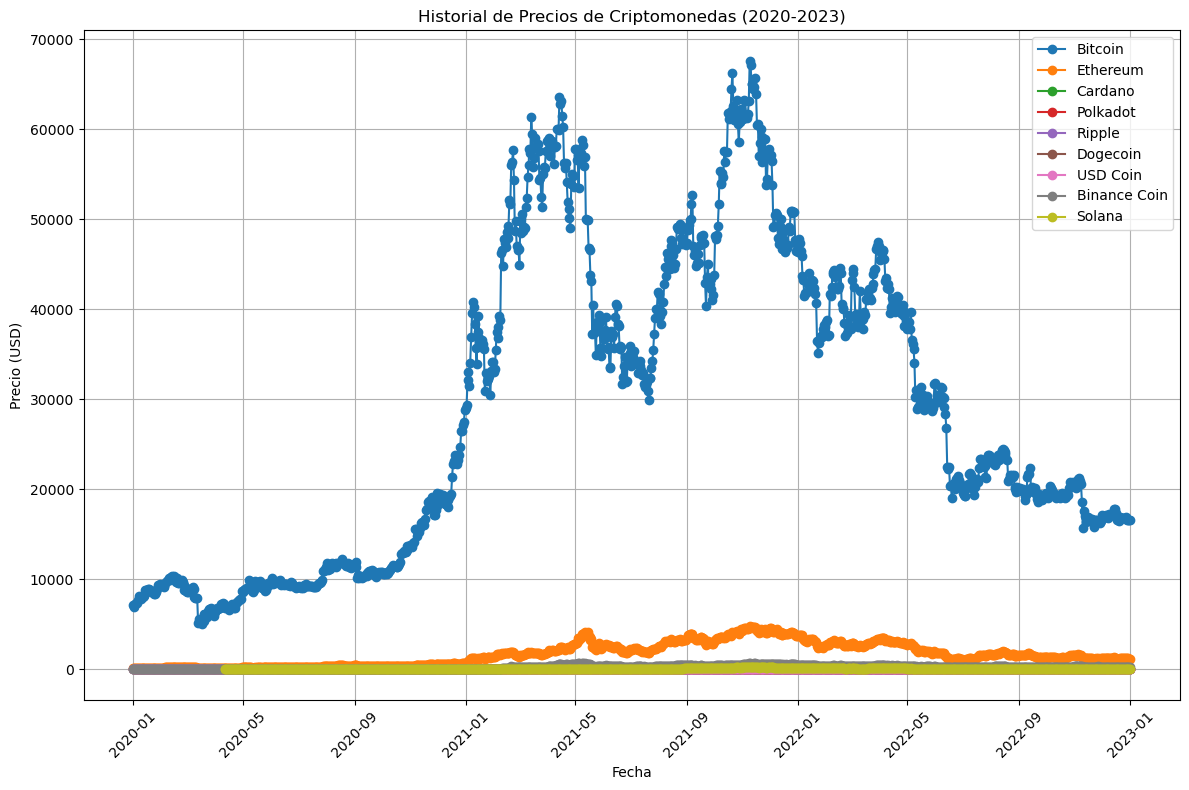

In [50]:
import requests
import datetime
import matplotlib.pyplot as plt

def get_historical_price(coin_id, start_date, end_date):
    url = f"https://api.coingecko.com/api/v3/coins/{coin_id}/market_chart/range"
    params = {
        "vs_currency": "usd",
        "from": start_date.timestamp(),
        "to": end_date.timestamp()
    }

    response = requests.get(url, params=params)
    data = response.json()
    return data

# Definir las fechas de inicio y fin
start_date = datetime.datetime(2020, 1, 1)
end_date = datetime.datetime(2023, 1, 1)

# Lista de criptomonedas y sus nombres
crypto_list = coins_analysis
crypto_names = ['Bitcoin', 'Ethereum', 'Cardano', 'Polkadot', 'Ripple', 'Dogecoin', 'USD Coin', 'Binance Coin', 'Solana']

plt.figure(figsize=(12, 8))

for coin_id, coin_name in zip(crypto_list, crypto_names):
    historical_data = get_historical_price(coin_id, start_date, end_date)
    dates = [datetime.datetime.fromtimestamp(entry[0] / 1000) for entry in historical_data['prices']]
    prices = [entry[1] for entry in historical_data['prices']]
    
    plt.plot(dates, prices, marker='o', linestyle='-', label=coin_name)

plt.xlabel('Fecha')
plt.ylabel('Precio (USD)')
plt.title('Historial de Precios de Criptomonedas (2020-2023)')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

# Mostrar el gráfico
plt.show()


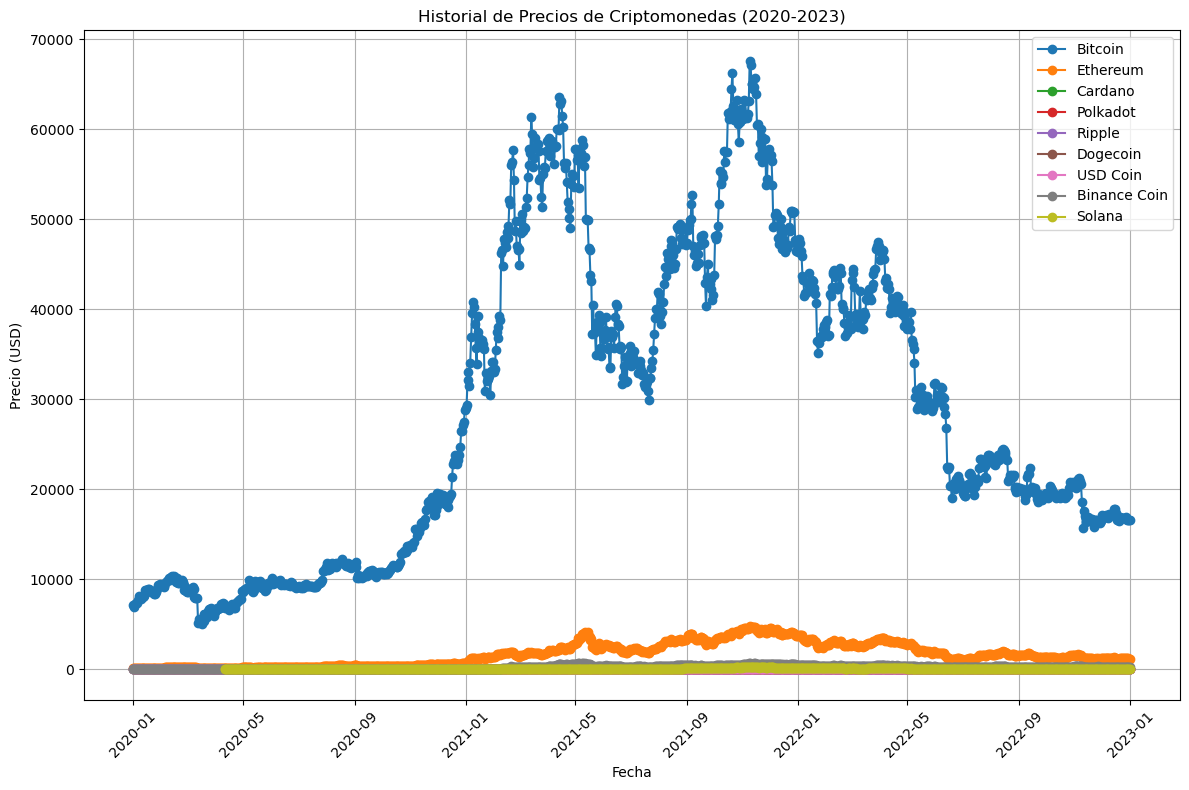

Los datos se han guardado en el archivo historial_precios_criptomonedas.csv


In [51]:
import requests
import datetime
import matplotlib.pyplot as plt
import csv

def get_historical_price(coin_id, start_date, end_date):
    url = f"https://api.coingecko.com/api/v3/coins/{coin_id}/market_chart/range"
    params = {
        "vs_currency": "usd",
        "from": start_date.timestamp(),
        "to": end_date.timestamp()
    }

    response = requests.get(url, params=params)
    data = response.json()
    return data

# Definir las fechas de inicio y fin
start_date = datetime.datetime(2020, 1, 1)
end_date = datetime.datetime(2023, 1, 1)

# Lista de criptomonedas y sus nombres
crypto_list = ['bitcoin', 'ethereum', 'cardano', 'polkadot', 'ripple', 'dogecoin', 'usd-coin', 'binancecoin', 'solana']
crypto_names = ['Bitcoin', 'Ethereum', 'Cardano', 'Polkadot', 'Ripple', 'Dogecoin', 'USD Coin', 'Binance Coin', 'Solana']

# Crear y abrir un archivo CSV para guardar los datos
csv_filename = 'historial_precios_criptomonedas.csv'
with open(csv_filename, mode='w', newline='') as csv_file:
    csv_writer = csv.writer(csv_file)
    csv_writer.writerow(['Fecha', 'Criptomoneda', 'Precio (USD)'])

    plt.figure(figsize=(12, 8))

    for coin_id, coin_name in zip(crypto_list, crypto_names):
        historical_data = get_historical_price(coin_id, start_date, end_date)
        dates = [datetime.datetime.fromtimestamp(entry[0] / 1000) for entry in historical_data['prices']]
        prices = [entry[1] for entry in historical_data['prices']]
        
        # Guardar los datos en el archivo CSV
        for date, price in zip(dates, prices):
            csv_writer.writerow([date, coin_name, price])

        plt.plot(dates, prices, marker='o', linestyle='-', label=coin_name)

    plt.xlabel('Fecha')
    plt.ylabel('Precio (USD)')
    plt.title('Historial de Precios de Criptomonedas (2020-2023)')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()

    # Mostrar el gráfico
    plt.show()

print(f"Los datos se han guardado en el archivo {csv_filename}")


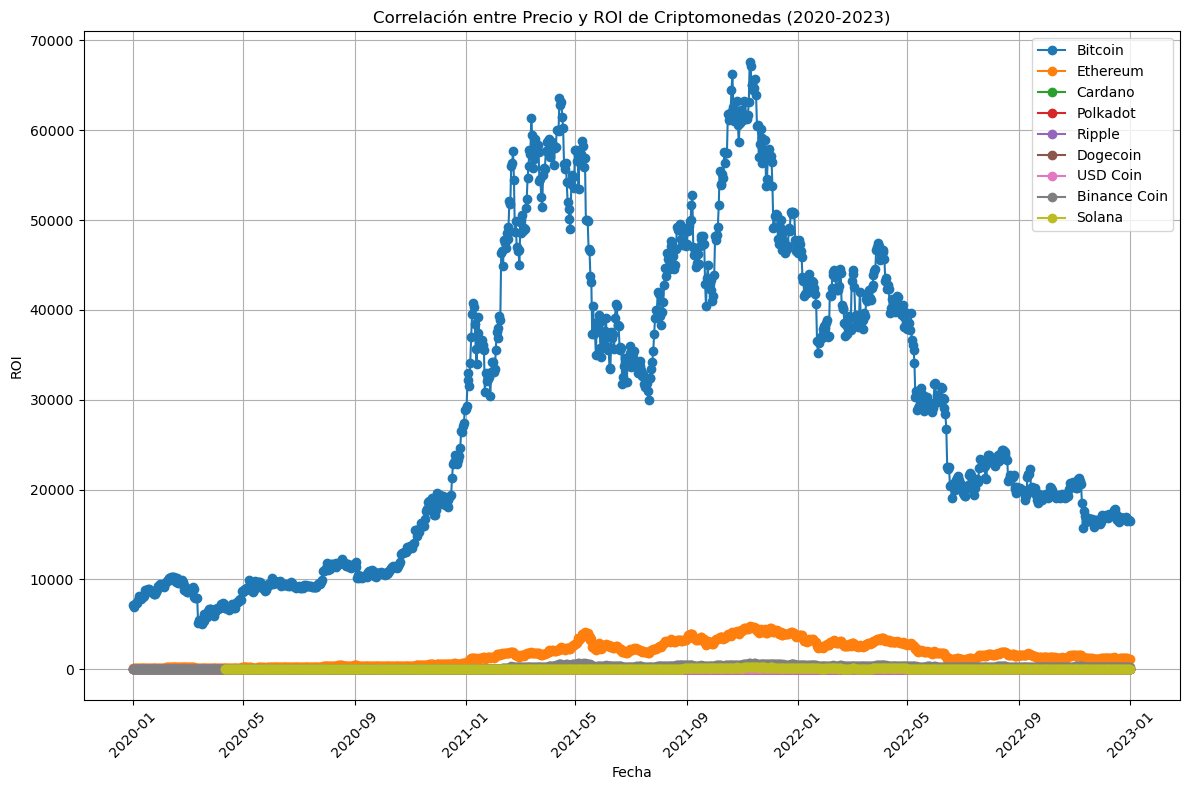

In [59]:
import requests
import datetime
import matplotlib.pyplot as plt

def get_historical_price(coin_id, start_date, end_date):
    url = f"https://api.coingecko.com/api/v3/coins/{coin_id}/market_chart/range"
    params = {
        "vs_currency": "usd",
        "from": start_date.timestamp(),
        "to": end_date.timestamp()
    }

    response = requests.get(url, params=params)
    data = response.json()
    return data

# Definir las fechas de inicio y fin
start_date = datetime.datetime(2020, 1, 1)
end_date = datetime.datetime(2023, 1, 1)

# Lista de criptomonedas y sus nombres
coins_analysis = ['bitcoin', 'ethereum', 'cardano', 'polkadot', 'ripple', 'dogecoin', 'usd-coin', 'binancecoin', 'solana']
crypto_names = ['Bitcoin', 'Ethereum', 'Cardano', 'Polkadot', 'Ripple', 'Dogecoin', 'USD Coin', 'Binance Coin', 'Solana']

plt.figure(figsize=(12, 8))

for coin_id, coin_name in zip(coins_analysis, crypto_names):
    historical_data = get_historical_price(coin_id, start_date, end_date)
    dates = [datetime.datetime.fromtimestamp(entry[0] / 1000) for entry in historical_data['prices']]
    prices = [entry[1] for entry in historical_data['prices']]
    rois = [entry[-1] for entry in historical_data['prices']]
    
    plt.plot(dates, rois, marker='o', linestyle='-', label=coin_name)

plt.xlabel('Fecha')
plt.ylabel('ROI')
plt.title('Correlación entre Precio y ROI de Criptomonedas (2020-2023)')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar el gráfico
plt.show()


Comparación de Criptomonedas: El gráfico te permite comparar el comportamiento del ROI entre diferentes criptomonedas en un mismo período de tiempo. Podrás identificar cuáles han tenido tendencias similares y cuáles se han comportado de manera diferente.

### Análisis complementado con Datos de la Reserva Federal de los Estados Unidos

No existe una base de datos única y centralizada que proporcione información detallada sobre la ubicación de los tenedores de criptomonedas de manera específica para cada criptomoneda, incluyendo las que has mencionado en tu lista. Las criptomonedas son descentralizadas por naturaleza y no están vinculadas a ubicaciones geográficas específicas de la misma manera que las monedas tradicionales.

La FRED API ofrece una amplia gama de datos económicos recopilados y publicados por la Reserva Federal de los Estados Unidos, que cubren diversos indicadores económicos, tasas de interés, inflación, empleo, producción, precios de bienes y más a nivel nacional.

Your registered API key is: f8a15d9e71bc1b79647828f168389f4d 

In [78]:
from fredapi import Fred
fred = Fred(api_key='f8a15d9e71bc1b79647828f168389f4d ')
data2 = fred.get_series('SP500')

In [79]:
data2

2013-08-19    1646.06
2013-08-20    1652.35
2013-08-21    1642.80
2013-08-22    1656.96
2013-08-23    1663.50
               ...   
2023-08-14    4489.72
2023-08-15    4437.86
2023-08-16    4404.33
2023-08-17    4370.36
2023-08-18    4369.71
Length: 2610, dtype: float64

ValueError: Cannot merge a Series without a name

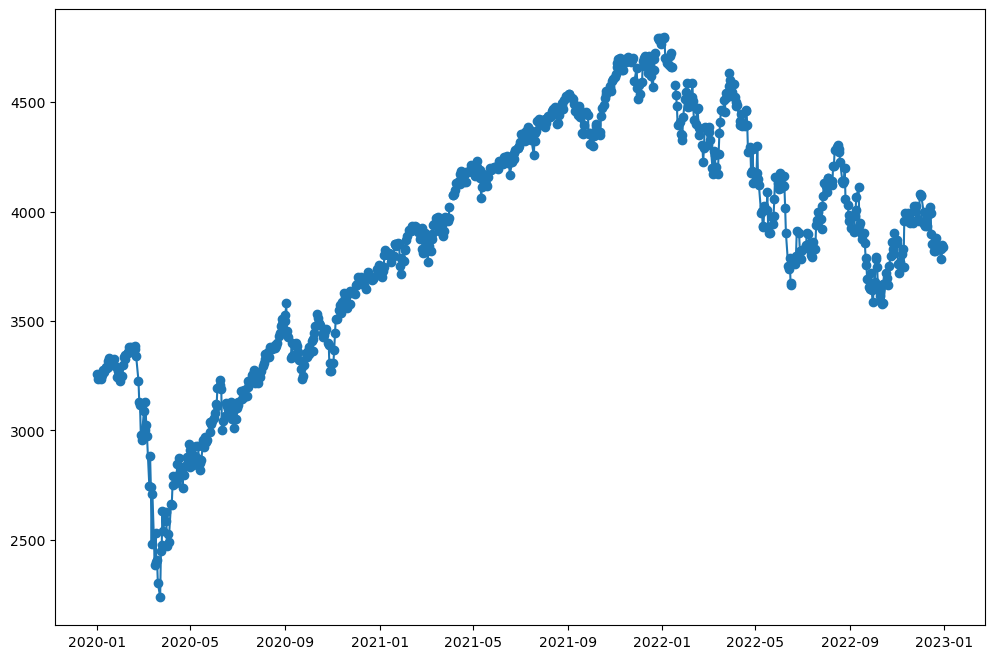

In [84]:
import requests
import datetime
import matplotlib.pyplot as plt
import pandas as pd
from fredapi import Fred

# Tu clave API de FRED
api_key = 'f8a15d9e71bc1b79647828f168389f4d'

# Crear instancia de la API de FRED
fred = Fred(api_key=api_key)

# Definir las fechas de inicio y fin
start_date = datetime.datetime(2020, 1, 1)
end_date = datetime.datetime(2023, 1, 1)

# Obtener datos del S&P 500 usando FRED API
sp500_df = fred.get_series('SP500', start_date, end_date)

# Lista de criptomonedas y sus nombres
coins_analysis = ['bitcoin']
crypto_names = ['Bitcoin']

# Crear la figura del gráfico
plt.figure(figsize=(12, 8))

# Gráfico de S&P 500
plt.plot(sp500_df.index, sp500_df.values, marker='o', linestyle='-', label='S&P 500')

# Obtener datos de las criptomonedas y sus ROIs
for coin_id, coin_name in zip(coins_analysis, crypto_names):
    historical_data = get_historical_price(coin_id, start_date, end_date)
    dates = [datetime.datetime.fromtimestamp(entry[0] / 1000) for entry in historical_data['prices']]
    rois = [entry[-1] for entry in historical_data['prices']]
    
    # Convertir datos en un DataFrame
    coin_df = pd.DataFrame({'Fecha': dates, f'{coin_name} ROI': rois})
    
    # Combinar los datos con el DataFrame de S&P 500
    sp500_df = pd.merge(sp500_df, coin_df, how='left', on='Fecha')

# Personalizar el gráfico
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.title('Comportamiento del S&P 500 y Correlación entre Precio y ROI de Criptomonedas (2020-2023)')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar el gráfico
plt.show()


### Graficación de la evolución de la capitalización de mercado del conjunto de criptomonedas durante el período de tiempo 2020-01-01 al 2023-01-01

Archivo CSV 'market_cap_data.csv' y gráfico 'market_cap_chart.png' creados exitosamente.


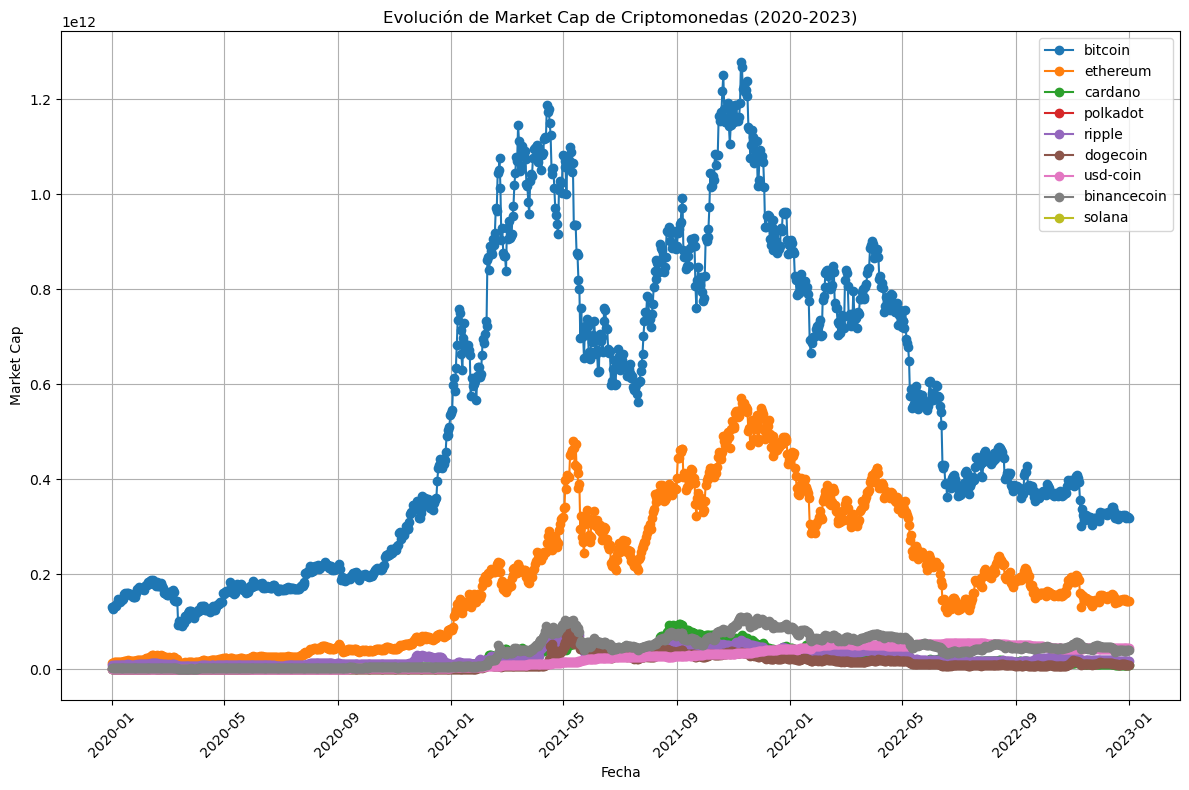

In [100]:
import requests
import datetime
import pandas as pd
import matplotlib.pyplot as plt

# Función para obtener datos históricos de market_cap
def get_historical_market_cap(coin_id, start_date, end_date):
    url = f"https://api.coingecko.com/api/v3/coins/{coin_id}/market_chart/range"
    params = {
        "vs_currency": "usd",
        "from": start_date.timestamp(),
        "to": end_date.timestamp()
    }
    response = requests.get(url, params=params)
    data = response.json()
    return data

# Definir las fechas de inicio y fin
start_date = datetime.datetime(2020, 1, 1)
end_date = datetime.datetime(2023, 1, 1)

# Lista de monedas para el análisis
coins_analysis = ['bitcoin', 'ethereum', 'cardano', 'polkadot', 'ripple', 'dogecoin', 'usd-coin', 'binancecoin', 'solana']

# Crear un DataFrame para almacenar los datos
df = pd.DataFrame(columns=['Date'] + coins_analysis)

# Obtener los datos de market_cap y agregarlos al DataFrame
for coin_id in coins_analysis:
    try:
        historical_data = get_historical_market_cap(coin_id, start_date, end_date)
        market_cap_data = [(entry[0] / 1000, entry[1]) for entry in historical_data['market_caps']]
        timestamps, market_caps = zip(*market_cap_data)
        dates = [datetime.datetime.fromtimestamp(timestamp) for timestamp in timestamps]
        
        df[coin_id] = market_caps
        df['Date'] = dates
    except:
        pass

# Guardar el DataFrame en un archivo CSV
csv_filename = 'market_cap_data.csv'
df.to_csv(csv_filename, index=False)

# Crear el gráfico
plt.figure(figsize=(12, 8))
for coin_id in coins_analysis:
    plt.plot(df['Date'], df[coin_id], marker='o', label=coin_id)

plt.xlabel('Fecha')
plt.ylabel('Market Cap')
plt.title('Evolución de Market Cap de Criptomonedas (2020-2023)')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

# Guardar el gráfico en una imagen
plt.savefig('market_cap_chart.png')

print(f"Archivo CSV '{csv_filename}' y gráfico 'market_cap_chart.png' creados exitosamente.")


### Grafiación de la evolución del Circulating Supply de las criptomonedas analizadas durante el período de tiempo 2020-01-01 al 2023-01-01

Archivo CSV 'circulating_supply_data.csv' y gráfico 'circulating_supply_chart.png' creados exitosamente.


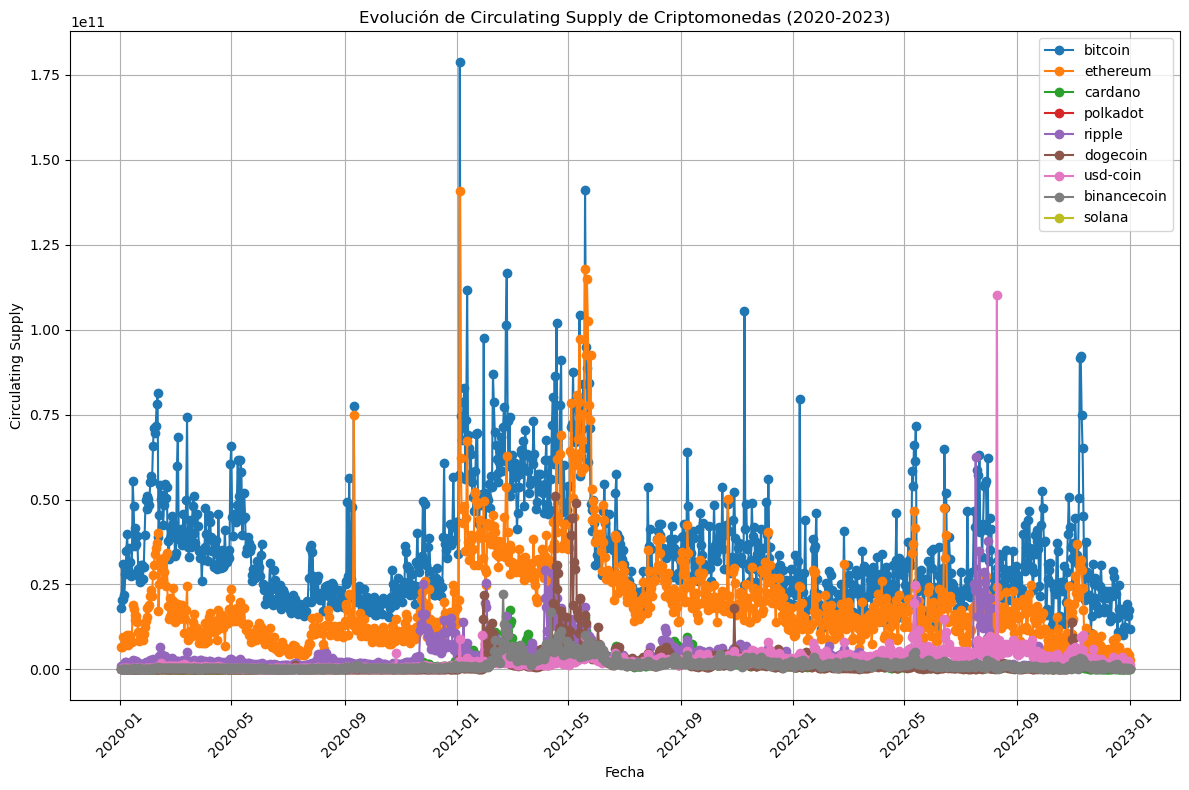

In [119]:
import requests
import datetime
import pandas as pd
import matplotlib.pyplot as plt

# Función para obtener datos históricos de circulating supply
def get_historical_supply(coin_id, start_date, end_date):
    url = f"https://api.coingecko.com/api/v3/coins/{coin_id}/market_chart/range"
    params = {
        "vs_currency": "usd",
        "from": start_date.timestamp(),
        "to": end_date.timestamp()
    }
    response = requests.get(url, params=params)
    data = response.json()
    return data

# Definir las fechas de inicio y fin
start_date = datetime.datetime(2020, 1, 1)
end_date = datetime.datetime(2023, 1, 1)

# Lista de monedas para el análisis
coins_analysis = ['bitcoin', 'ethereum', 'cardano', 'polkadot', 'ripple', 'dogecoin', 'usd-coin', 'binancecoin', 'solana']

# Crear un DataFrame para almacenar los datos
df = pd.DataFrame(columns=['Date'] + coins_analysis)

# Obtener los datos de circulating supply y agregarlos al DataFrame
for coin_id in coins_analysis:
    try:
        historical_data = get_historical_supply(coin_id, start_date, end_date)
        supply_data = [(entry[0] / 1000, entry[1]) for entry in historical_data['total_volumes']]
        timestamps, supplies = zip(*supply_data)
        dates = [datetime.datetime.fromtimestamp(timestamp) for timestamp in timestamps]
        
        df[coin_id] = supplies
        df['Date'] = dates
    except:
        pass

# Guardar el DataFrame en un archivo CSV
csv_filename = 'circulating_supply_data.csv'
df.to_csv(csv_filename, index=False)

# Crear el gráfico
plt.figure(figsize=(12, 8))
for coin_id in coins_analysis:
    plt.plot(df['Date'], df[coin_id], marker='o', label=coin_id)

plt.xlabel('Fecha')
plt.ylabel('Circulating Supply')
plt.title('Evolución de Circulating Supply de Criptomonedas (2020-2023)')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

# Guardar el gráfico en una imagen
plt.savefig('circulating_supply_chart.png')

print(f"Archivo CSV '{csv_filename}' y gráfico 'circulating_supply_chart.png' creados exitosamente.")
